**Performing Gradient Descent in Regression.**

In [1]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Prepare the dataset
We generate some random data points with 500 rows and 2 columns (x and y) and use for training:

In [2]:
data=np.random.randn(500,2)

In [3]:
data[0]


array([ 1.99597148, -0.5700347 ])

First column indicates the x value, the second indicates y

In [4]:
data[0,1]


np.float64(-0.5700346953655001)

Equation of a simple linear regression is expressed as:
$\hat{y} = mx + b$

Thus, we have two parameters
 and
 We store both of these parameter
 and
 in an array called theta. First, we initialize theta with zeros as shown below:


In [5]:
theta = np.zeros(2)


In [6]:
theta


array([0., 0.])

theta[0] represents the value of m
 and theta[1] represents the value of b

**Defining the loss function**






$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$


Loss Function
Mean Squared Error (MSE) of Regression is given as:



Where
 N is the number of training samples,
 y is the actual value and
$ \hat{y} $ is the predicted value.

The above loss function can be implemented as:

We feed the data and the model parameter theta to the loss function which returns the MSE. Remember, data[,0] has
 x value and data[,1] has
 y value. Similarly,  theta [0] has a value of
 m and theta[1] has a value of b
.

In [10]:
def loss_function(data,theta):

    #get m and b
    m = theta[0]
    b = theta[1]

    loss = 0

    #for each iteration
    for i in range(0, len(data)):

        #get x and y
        x = data[i, 0]
        y = data[i, 1]

        #predict the value of y
        y_hat = (m*x + b)

        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)

    #mean sqaured error
    mse = loss / float(len(data))

    return mse

In [11]:
loss_function(data, theta)


np.float64(1.0265845932658701)

Now, we need to minimize this loss. In order to minimize the loss, we need to
calculate the gradient of the loss function J , with respect to the model
parameters m  and b and update the parameter according to the parameter
update rule. First, we will calculate the gradients of the loss function.


**Gradients of Loss Function**
Gradients of loss function \( \mathcal{J} \) with respect to parameter \( m \) is given as:

$$
\frac{dJ}{dm} = \frac{2}{N} \sum_{i=1}^{N} -x_i \left( y_i - (mx_i + b) \right)
$$

Gradients of loss function \( \mathcal{J} \) with respect to parameter \( b \) is given as:

$$
\frac{dJ}{db} = \frac{2}{N} \sum_{i=1}^{N} -\left( y_i - (mx_i + b) \right)
$$

We define a function called `compute_gradients` which takes the data and parameter theta as an input and returns the computed gradients:


In [12]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)

    #total number of data points
    N = float(len(data))

    m = theta[0]
    b = theta[1]

    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]

        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))

        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [13]:
compute_gradients(data,theta)


array([0.0001555 , 0.00034839])

After computing gradients we need to update our model paramater according to our update rule as given below:



$$m = m - \alpha \frac{dJ}{dm} \text{ }$$

$$b = b - \alpha \frac{dJ}{db} \text{ }$$

Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as:

$$\theta = \theta - \alpha \frac{dJ}{d\theta} \text{ }$$

As we learned in the previous section, updating gradients for just one time will not lead us to the convergence i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for several iterations:

In [14]:
num_iterations = 50000


learning rate

In [15]:
lr = 1e-2


Define a list called loss for storing the loss on every iterations:
On each iteration, calculate gradients and update the gradients according to our paramater update rule:





In [17]:
loss = []


In [18]:
theta = np.zeros(2)

for t in range(num_iterations):

    #compute gradients
    gradients = compute_gradients(data, theta)

    #update parameter
    theta = theta - (lr*gradients)

    #store the loss
    loss.append(loss_function(data,theta))

The below plot shows how the loss(cost) decreases over the training iterations:



Text(0.5, 1.0, 'Gradient Descent')

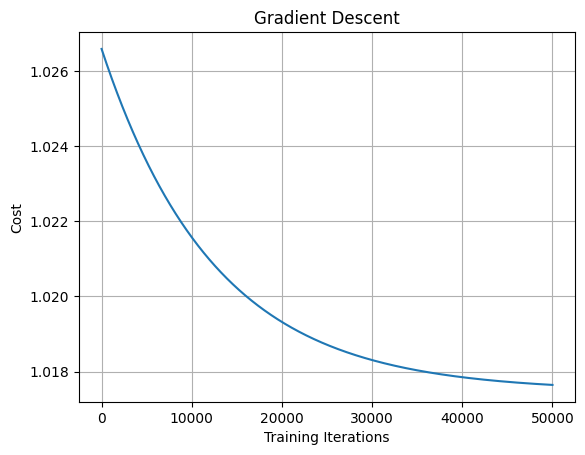

In [19]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

Thus, we learned that gradient descent can be used for finding the optimal parameters of the model with which we can minimize the loss.